# **DermaGPT**

In [1]:
# Necessary packages
%pip install datasets --quiet
%pip install python-dotenv --quiet
%pip install sentence-transformers --quiet
%pip install pinecone-client --quiet
%pip install pinecone --quiet
%pip install -U langchain langchain-openai
%pip install wordcloud --quiet
%pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **API Usage**

### **Observe Raw API Response**

In [2]:
import requests
import json
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Select the first image only
photo_url = "https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg"
api_url = os.getenv("FACE_ANALYSIS_API_URL")

payload = {"data": {"photo_url": photo_url}}

try:
    response = requests.post(api_url, json=payload)
    result = response.json()

    print(f"\n📸 Image: {photo_url}")
    print("📦 Raw API Output:")
    print(json.dumps(result, indent=2))

except Exception as e:
    print("❌ Error while fetching raw output")
    print(f"Status Code: {response.status_code}")
    print(response.text)


📸 Image: https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg
📦 Raw API Output:
{
  "message": "Your Wrinkle is Gotten Successfully",
  "acne": [
    {
      "region": "Frontal",
      "level": "None"
    },
    {
      "region": "Eye",
      "level": "None"
    },
    {
      "region": "Nose",
      "level": "None"
    },
    {
      "region": "Lips",
      "level": "None"
    },
    {
      "region": "Leftcheeks",
      "level": "None"
    },
    {
      "region": "Rightcheeks",
      "level": "1"
    }
  ],
  "wrinkle": [
    {
      "region": "Frontal",
      "level": "2"
    },
    {
      "region": "Eye",
      "level": "None"
    },
    {
      "region": "Nose",
      "level": "None"
    },
    {
      "region": "Lips",
      "level": "None"
    },
    {
      "region": "Leftcheeks",
      "level": "1"
    },
    {
      "region": "Rightcheeks",
      "level": "1"
    }
  ]
}


### **Observing Several API Responses**

In [3]:
import requests
import time

photo_urls = [
    "https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg",
    "https://images.pexels.com/photos/415829/pexels-photo-415829.jpeg",
    "https://images.pexels.com/photos/2598024/pexels-photo-2598024.jpeg",
    "https://images.pexels.com/photos/35065/homeless-man-color-poverty.jpg",
    "https://images.pexels.com/photos/2380794/pexels-photo-2380794.jpeg",
    "https://images.pexels.com/photos/2709388/pexels-photo-2709388.jpeg"
]

api_url = os.getenv("FACE_ANALYSIS_API_URL")

results = []  # Store all API results here

for i, photo_url in enumerate(photo_urls, start=1):
    print(f"\n📸 Image {i}: {photo_url}")

    payload = {"data": {"photo_url": photo_url}}

    try:
        response = requests.post(api_url, json=payload)
        result = response.json()

        # Build summary for logging
        wrinkle_summary = ", ".join(
            [f"{r['region']}:{r['level']}" for r in result.get("wrinkle", [])]
        )
        acne_summary = ", ".join(
            [f"{r['region']}:{r['level']}" for r in result.get("acne", [])]
        )

        print("🧠 Summary:")
        print(f"  Wrinkle → {wrinkle_summary}")
        print(f"  Acne    → {acne_summary}")

        # Add structured result to the list
        results.append({
            "image": photo_url,
            "wrinkle": result.get("wrinkle", []),
            "acne": result.get("acne", [])
        })

    except Exception as e:
        print(f"❌ Error for Image {i}: {e}")
        print(f"Status Code: {response.status_code}")
        print(response.text)

    time.sleep(1)


📸 Image 1: https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg
🧠 Summary:
  Wrinkle → Frontal:2, Eye:None, Nose:None, Lips:None, Leftcheeks:1, Rightcheeks:1
  Acne    → Frontal:None, Eye:None, Nose:None, Lips:None, Leftcheeks:None, Rightcheeks:1

📸 Image 2: https://images.pexels.com/photos/415829/pexels-photo-415829.jpeg
🧠 Summary:
  Wrinkle → Frontal:None, Eye:None, Nose:None, Lips:None, Leftcheeks:None, Rightcheeks:None
  Acne    → Frontal:None, Eye:None, Nose:None, Lips:None, Leftcheeks:None, Rightcheeks:None

📸 Image 3: https://images.pexels.com/photos/2598024/pexels-photo-2598024.jpeg
🧠 Summary:
  Wrinkle → Frontal:1, Eye:None, Nose:None, Lips:1, Leftcheeks:2, Rightcheeks:2
  Acne    → Frontal:None, Eye:None, Nose:None, Lips:None, Leftcheeks:None, Rightcheeks:None

📸 Image 4: https://images.pexels.com/photos/35065/homeless-man-color-poverty.jpg
🧠 Summary:
  Wrinkle → Frontal:2, Eye:1, Nose:None, Lips:None, Leftcheeks:1, Rightcheeks:1
  Acne    → Frontal:None, Eye:Non

### **API Response Breakdown**

The face analysis API returns localized wrinkle and acne severity levels for 6 facial regions:

- Frontal
- Eye
- Nose
- Lips
- Leftcheeks
- Rightcheeks

Each `"level"` field represents the detected severity in that region:

- `"None"` → No visible wrinkle or acne
- `"1"` → Mild presence
- `"2"` → Noticeable/moderate presence

> ⚠️ Based on observed responses, `"2"` appears to be the current maximum level returned by the API. Levels `"3"` to `"5"` have not been observed and may not be supported.

### **Scoring Strategy**

The wrinkle and acne analysis API returns separate `"level"` values for each facial region (e.g., Frontal, Eye, Lips). To simplify this into a single score that can be embedded into the RAG prompt, I decided to apply the following normalization strategy:

1. Convert `"None"` to `0` (meaning no visible issue)
2. Parse string numbers like `"1"` and `"2"` as integers  
   > ⚠️ Levels `"3"` to `"5"` have not been observed in practice and are excluded
3. Ignore invalid or missing entries
4. Calculate the average across all facial regions
5. Round to two decimal places

This produces a float score (e.g., `0.33` and `1.67`) that reflects the overall severity of wrinkles or acne, and can be further interpreted using qualitative labels like Low / Moderate.

In [4]:
# Function to calculate average level score across facial regions
def average_score(regions):
    level_map = {"None": 0, "1": 1, "2": 2}  # Max level observed = 2
    values = [level_map.get(r["level"], 0) for r in regions if r["level"] in level_map]
    return round(sum(values) / len(values), 2) if values else 0

In [5]:
# Loop over results and print average scores
print("\n📊 Average Score Summary:")
for i, entry in enumerate(results, start=1):
    wrinkle_avg = average_score(entry["wrinkle"])
    acne_avg = average_score(entry["acne"])

    print(f"\n📸 Image {i}: {entry['image']}")
    print(f"✅ Average Wrinkle Score: {wrinkle_avg}")
    print(f"✅ Average Acne Score: {acne_avg}")


📊 Average Score Summary:

📸 Image 1: https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg
✅ Average Wrinkle Score: 0.67
✅ Average Acne Score: 0.17

📸 Image 2: https://images.pexels.com/photos/415829/pexels-photo-415829.jpeg
✅ Average Wrinkle Score: 0.0
✅ Average Acne Score: 0.0

📸 Image 3: https://images.pexels.com/photos/2598024/pexels-photo-2598024.jpeg
✅ Average Wrinkle Score: 1.0
✅ Average Acne Score: 0.0

📸 Image 4: https://images.pexels.com/photos/35065/homeless-man-color-poverty.jpg
✅ Average Wrinkle Score: 0.83
✅ Average Acne Score: 0.17

📸 Image 5: https://images.pexels.com/photos/2380794/pexels-photo-2380794.jpeg
✅ Average Wrinkle Score: 1.33
✅ Average Acne Score: 0.17

📸 Image 6: https://images.pexels.com/photos/2709388/pexels-photo-2709388.jpeg
✅ Average Wrinkle Score: 0.33
✅ Average Acne Score: 1.67


### **Sample User Quiz Answers**

In [6]:
user_quiz = {
    "age": 23,
    "gender": "0",
    "has_botox": "0",
    "skin_type": "0",
    "main_goals": [1, 2],
    "daily_water": 3,
    "sleep_duration": 7,
    "focused_face_area": [4, 5, 6],
    "skin_sensitivities": [1],
    "daily_exercise_duration": 30,
    "daily_exercise_days_per_week": 3
}

### **🧠 Converting the Quiz JSON to Natural Language**

While working with large language models like GPT, I noticed that feeding raw JSON objects (like the user’s skincare quiz data) often leads to vague or overly generic responses.

To improve both comprehension and personalization, I convert the structured `quiz_data` dictionary into a coherent natural language summary (`quiz_text`). This summary includes relevant details about the user's age, skin type, lifestyle, skincare goals, and — when available — facial image analysis scores.

#### **💡 Why This Helps**

Language models like GPT are optimized for human-style text understanding. Giving them raw keys like `"skin_type": 1` is less effective than saying:

> "His skin type is Oily."

Similarly, rather than sending `"wrinkle_score": 1.4`, I convert this to:

> "His wrinkle level is Low (1.40) on a 3-point scale."

Pronouns and possessives are also adjusted dynamically based on the user's gender (`"0"` for Male, `"1"` for Female, `"2"` for Other/They).

#### **🧪 Interpreting Image Scores**

If image analysis is available, I include both **average wrinkle/acne scores** and **focused region scores**. Each region (like `Lips`, `Leftcheeks`) is annotated with its wrinkle/acne level if present in the user’s quiz focus.

Score values are translated to descriptive levels:

| Score Range | Interpretation |
|-------------|----------------|
| `0`         | None           |
| `0.1–1.4`   | Low            |
| `1.5–2.5`   | Moderate       |

These thresholds are based on real API observations, where scores typically range from 0 to ~2.5.

#### **⚙️ Fallback Behavior**

If no image is provided or the analysis fails, the generator excludes wrinkle/acne sections and builds the summary solely from quiz fields. This ensures graceful degradation and allows the LLM to still provide meaningful recommendations.

#### **📍 Additional Enhancements**

- Units like minutes, hours, and days are **pluralized correctly** (`1 hour` vs. `2 hours`).
- Skin sensitivities like **Fragrance** or **Alcohol** are also included if specified.
- Safe fallbacks like `"unknown"` are used for unexpected values in quiz JSON.

#### **🧾 Example Output (from `convert_quiz_to_text()`)**

> He is 25 years old and has not had botox.  
> His skin type is Oily.  
> His main skincare goals are: hydration, wrinkle prevention.  
> He drinks 3 cups of water daily and sleeps around 7 hours per night.  
> He exercises 30 minutes per day, 3 days per week.  
> Based on image analysis, his wrinkle level is Low (1.40) and acne level is Moderate (2.10), on a 3-point scale.  
> His focused facial regions include: Lips (wrinkle: Low, acne: None), Leftcheeks (wrinkle: None, acne: Moderate).  
> He has sensitivities to: Fragrance.

---

This enriched natural language summary, when provided as context to the LLM, significantly enhances the **accuracy, personalization, and nuance** of the skincare recommendations.

In [7]:
def convert_quiz_to_text(
    quiz_data: dict,
    wrinkle_data: list = None,
    acne_data: list = None,
    wrinkle_score: float = None,
    acne_score: float = None
) -> str:
    # Mappings
    skin_type_map = {0: "Normal", 1: "Oily", 2: "Dry", 3: "Combination"}
    goals_map = {
        1: "hydration",
        2: "wrinkle prevention",
        3: "acne care",
        4: "brightening"
    }
    areas_map = {
        1: "Frontal", 2: "Eye", 3: "Nose", 4: "Lips", 5: "Leftcheeks", 6: "Rightcheeks"
    }
    sensitivities_map = {
        0: "Fragrance", 1: "Alcohol", 2: "Parabens", 3: "Sulfates"
    }
    gender_pronoun = {
        "0": ("he", "his"), "1": ("she", "her"), "2": ("they", "their")
    }

    def interpret_score(score):
        try:
            score = float(score)
        except (TypeError, ValueError):
            return "None"
        if score == 0:
            return "None"
        elif score < 1.5:
            return "Low"
        else:
            return "Moderate"

    def get_level(region_list, region_name):
        for region in region_list:
            if region["region"] == region_name:
                return interpret_score(region["level"])
        return "None"

    def pluralize(value, unit):
        return f"{value} {unit}" + ("" if value == 1 else "s")

    pronoun, possessive = gender_pronoun.get(str(quiz_data.get("gender", "2")), ("they", "their"))

    # Quiz section
    base_text = f"""{pronoun.capitalize()} is {quiz_data['age']} years old and has {'had botox' if quiz_data['has_botox'] == '1' else 'not had botox'}.
{possessive.capitalize()} skin type is {skin_type_map.get(int(quiz_data['skin_type']), 'unknown')}.
{possessive.capitalize()} main skincare goals are: {', '.join([goals_map.get(g, 'unknown') for g in quiz_data['main_goals']])}.
{pronoun.capitalize()} drinks {quiz_data['daily_water']} cups of water daily and sleeps around {pluralize(quiz_data['sleep_duration'], 'hour')} per night.
{pronoun.capitalize()} exercises {pluralize(quiz_data['daily_exercise_duration'], 'minute')} per day, {pluralize(quiz_data['daily_exercise_days_per_week'], 'day')} per week."""

    # Sensitivities (optional)
    sensitivities_list = quiz_data.get("skin_sensitivities", [])
    if sensitivities_list:
        base_text += f"\n{pronoun.capitalize()} has sensitivities to: " + ", ".join(
            [sensitivities_map.get(s, "unknown") for s in sensitivities_list]) + "."

    # Image-based scores (optional)
    if wrinkle_score is not None and acne_score is not None:
        wrinkle_level = interpret_score(wrinkle_score)
        acne_level = interpret_score(acne_score)
        base_text += f"\nBased on image analysis, {possessive} wrinkle level is {wrinkle_level} ({wrinkle_score:.2f}) and acne level is {acne_level} ({acne_score:.2f}), on a 3-point scale."

    if wrinkle_data and acne_data:
        focused_details = []
        for area_id in quiz_data.get("focused_face_area", []):
            name = areas_map.get(area_id, "unknown")
            wrinkle = get_level(wrinkle_data, name)
            acne = get_level(acne_data, name)
            focused_details.append(f"{name} (wrinkle: {wrinkle}, acne: {acne})")
        focused_summary = ', '.join(focused_details)
        base_text += f"\n{possessive.capitalize()} focused facial regions include: {focused_summary}."

    return base_text

In [8]:
result = results[0]

quiz_text = convert_quiz_to_text(user_quiz, result["wrinkle"], result["acne"], wrinkle_avg, acne_avg)

In [9]:
print(quiz_text)

He is 23 years old and has not had botox.
His skin type is Normal.
His main skincare goals are: hydration, wrinkle prevention.
He drinks 3 cups of water daily and sleeps around 7 hours per night.
He exercises 30 minutes per day, 3 days per week.
He has sensitivities to: Alcohol.
Based on image analysis, his wrinkle level is Low (0.33) and acne level is Moderate (1.67), on a 3-point scale.
His focused facial regions include: Lips (wrinkle: None, acne: None), Leftcheeks (wrinkle: Low, acne: None), Rightcheeks (wrinkle: Low, acne: Low).


## **Collecting QA Pairs**

### **🧠 Pinecone Vector Upload**

This script embeds QA pairs from the dermatology dataset and uploads them to the Pinecone index `dermagpt-safe`.

#### **🔹 What It Does**
- Loads all QA pairs (or a subset via `num_questions`)
- Embeds each question using `all-MiniLM-L6-v2`
- Creates (or replaces) the Pinecone index with 384-dim cosine vectors
- Uploads vectors in small batches (default: 50)

#### **📦 Vector Format**
Each vector includes:
- `id`: Unique QA ID (e.g., `qa_0`)
- `values`: 384-dimensional embedding
- `metadata`: Original question and answer

#### **🔁 Why Batching?**
- Avoids timeouts and memory issues
- Helps retry failed uploads
- Makes progress tracking easier

✅ At the end, all vectors are uploaded and the script confirms success.

In [10]:
import os
import time
from dotenv import load_dotenv
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
from pinecone import Pinecone, ServerlessSpec

# === Config ===
index_name = "dermagpt-safe"
namespace = "default"
embedding_dim = 384
num_questions = None  # Tweak here to change the number of QA pairs to upload (None: all of them)

# === Load API Key from .env ===
load_dotenv()
api_key = os.getenv("PINECONE_API_KEY")
if not api_key:
    raise RuntimeError("❌ PINECONE_API_KEY not found in .env file")

# === Load Dataset ===
dataset = load_dataset("Mreeb/Dermatology-Question-Answer-Dataset-For-Fine-Tuning")
raw_pairs = dataset["train"]

qa_pairs = [
    {
        "id": f"qa_{i}",
        "question": item["prompt"].strip(),
        "answer": item["response"].strip()
    }
    for i, item in enumerate(raw_pairs)
    if item["prompt"] and item["response"]
]
if num_questions:
    qa_pairs = qa_pairs[:num_questions]

print(f"✅ Selected {len(qa_pairs)} question-answer pairs")

# === Embed Questions ===
model = SentenceTransformer("all-MiniLM-L6-v2")
questions = [qa["question"] for qa in qa_pairs]
embeddings = model.encode(questions, convert_to_tensor=False)
print(f"✅ Embedded {len(embeddings)} questions")

# === Connect to Pinecone ===
pc = Pinecone(api_key=api_key)

if index_name in pc.list_indexes().names():
    print(f"🧨 Deleting existing index: {index_name}")
    pc.delete_index(index_name)
    time.sleep(2)

print("📦 Creating Pinecone index...")
pc.create_index(
    name=index_name,
    dimension=embedding_dim,
    metric="cosine",
    spec=ServerlessSpec(cloud="aws", region="us-east-1")
)

# === Wait for Index to Be Ready ===
print("⏳ Waiting for index readiness...")
index = pc.Index(index_name)
ready = False
for _ in range(60):
    try:
        stats = index.describe_index_stats()
        if stats:
            print("✅ Index is ready")
            ready = True
            break
    except Exception as e:
        print(f"Waiting... ({e})")
    time.sleep(2)

if not ready:
    raise RuntimeError("❌ Timeout: Index is not ready")

# === Prepare Vectors with Metadata ===
vectors = [
    {
        "id": qa["id"],
        "values": embeddings[i].tolist(),
        "metadata": {
            "question": qa["question"],
            "answer": qa["answer"]
        }
    }
    for i, qa in enumerate(qa_pairs)
]

# === Upload Vectors in Batches ===
batch_size = 50
num_batches = (len(vectors) + batch_size - 1) // batch_size
print(f"📤 Uploading vectors in {num_batches} batches...")

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min(start_idx + batch_size, len(vectors))
    batch = vectors[start_idx:end_idx]

    try:
        index.upsert(vectors=batch, namespace=namespace)
        print(f"  ✅ Batch {i+1}/{num_batches} uploaded ({len(batch)} vectors)")
        time.sleep(1)  # Optional: Small pause between batches
    except Exception as e:
        print(f"  ❌ Error uploading batch {i+1}: {e}")

print(f"✅ Successfully uploaded {len(vectors)} vectors to Pinecone")
print(f"✅ Index name: {index_name}, Namespace: {namespace}")
print("✅ Vector upload complete.")

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Selected 1460 question-answer pairs
✅ Embedded 1460 questions
🧨 Deleting existing index: dermagpt-safe
📦 Creating Pinecone index...
⏳ Waiting for index readiness...
✅ Index is ready
📤 Uploading vectors in 30 batches...
  ✅ Batch 1/30 uploaded (50 vectors)
  ✅ Batch 2/30 uploaded (50 vectors)
  ✅ Batch 3/30 uploaded (50 vectors)
  ✅ Batch 4/30 uploaded (50 vectors)
  ✅ Batch 5/30 uploaded (50 vectors)
  ✅ Batch 6/30 uploaded (50 vectors)
  ✅ Batch 7/30 uploaded (50 vectors)
  ✅ Batch 8/30 uploaded (50 vectors)
  ✅ Batch 9/30 uploaded (50 vectors)
  ✅ Batch 10/30 uploaded (50 vectors)
  ✅ Batch 11/30 uploaded (50 vectors)
  ✅ Batch 12/30 uploaded (50 vectors)
  ✅ Batch 13/30 uploaded (50 vectors)
  ✅ Batch 14/30 uploaded (50 vectors)
  ✅ Batch 15/30 uploaded (50 vectors)
  ✅ Batch 16/30 uploaded (50 vectors)
  ✅ Batch 17/30 uploaded (50 vectors)
  ✅ Batch 18/30 uploaded (50 vectors)
  ✅ Batch 19/30 uploaded (50 vectors)
  ✅ Batch 20/30 uploaded (50 vectors)
  ✅ Batch 21/30 uploaded (50

## **Find Related Questions**

In [11]:
# Test Case 1
user_question = "What are the best treatments for acne?"

test_questions = [
    "What are the best treatments for acne?",
    "Does stress affect my skin?",
    "How should I take care of dry skin?",
    "Can diet impact my skin health?",
    "How does estrogen therapy affect the skin?",
    "What sunscreen should I use daily?",
    "How do I reduce wrinkles under my eyes?",
    "Is my skincare routine making me break out?",
]

# will be used for recall@k and mrr calculation
ground_truth_keywords = [
    ["benzoyl peroxide", "retinoid", "salicylic acid"],
    ["stress", "hormonal changes", "acne trigger"],
    ["moisturizer", "hydration", "emollient", "ceramide"],
    ["sugar", "dairy", "refined carbs", "glycemic index"],
    ["estrogen", "hormonal", "collagen", "menopause"],
    ["SPF", "broad spectrum", "zinc oxide", "daily sunscreen"],
    ["retinoid", "peptides", "hyaluronic acid", "eye cream"],
    ["comedogenic", "ingredient sensitivity", "over-exfoliation"]
]

In [18]:
import os
from dotenv import load_dotenv
from pinecone import Pinecone
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt

# === Config ===
load_dotenv()
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")
INDEX_NAME = "dermagpt-safe"
NAMESPACE = "default"
TOP_K = 8
THRESHOLDS = [0.5, 0.6, 0.7]

# === Init ===
pc = Pinecone(api_key=PINECONE_API_KEY)
index = pc.Index(INDEX_NAME)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# === Collect results into a dataframe ===
records = []

for question in test_questions:
    embedded = embedding_model.encode(question).tolist()
    query_result = index.query(
        vector=embedded,
        top_k=TOP_K,
        include_metadata=True,
        namespace=NAMESPACE
    )

    for threshold in THRESHOLDS:
        filtered = [m for m in query_result.matches if m.score >= threshold]
        records.append({
            "question": question,
            "threshold": threshold,
            "match_count": len(filtered)
        })

# Prepare context from retrieved QA pairs
context = "\n\n".join([
    f"Q: {m['metadata']['question']}\nA: {m['metadata']['answer']}"
    for m in query_result.matches
])

df = pd.DataFrame(records)

### **🔍 Threshold Selection for QA Retrieval**

To determine the ideal similarity threshold for Pinecone-based QA retrieval, we evaluated 8 diverse user questions across 3 threshold levels: `0.5`, `0.6`, and `0.7`.

#### **Key Observations**:

- **0.5**: Retrieves maximum results but includes some weakly relevant matches, especially on niche queries like hormone therapy.
- **0.6**: Provides a strong balance between coverage and relevance. Most general questions retain full QA coverage while noisy matches are filtered out.
- **0.7**: Too aggressive; several relevant but lower-confidence results are excluded, reducing answer diversity.

#### **✅ Recommended Threshold: 0.6**
This threshold consistently delivers high-quality QA snippets while maintaining sufficient context for LLM prompting. It was selected as the default for production use.

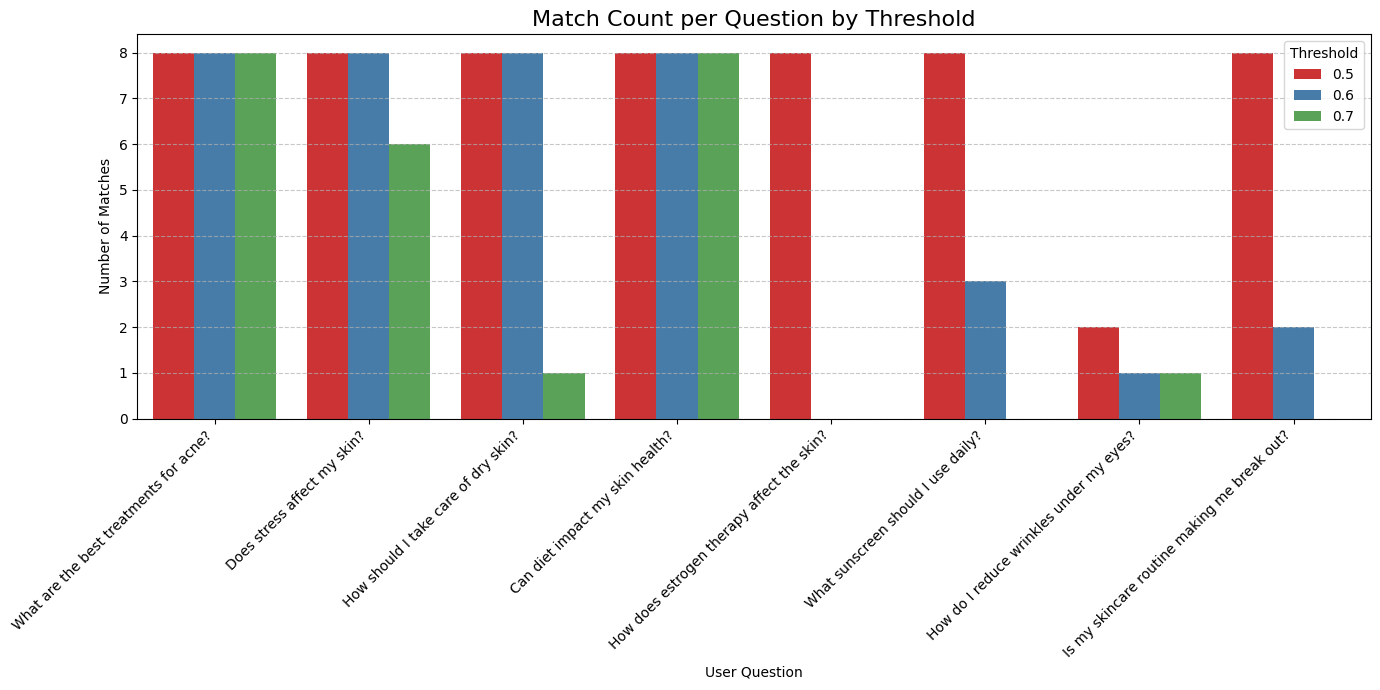

In [19]:
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(data=df, x="question", y="match_count", hue="threshold", palette='Set1')

plt.title("Match Count per Question by Threshold", fontsize=16)
plt.ylabel("Number of Matches")
plt.xlabel("User Question")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Threshold")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [42]:
import matplotlib.pyplot as plt

def evaluate_recall_and_mrr(test_questions, ground_truth_keywords, k_values=[1, 3, 5, 8]):
    recall_scores = []
    mrr_scores = []

    for k in k_values:
        correct_recall = 0
        reciprocal_ranks = []

        for question, keywords in zip(test_questions, ground_truth_keywords):
            embedded_q = embedding_model.encode(question).tolist()
            results = index.query(
                vector=embedded_q,
                top_k=k,
                include_metadata=True,
                namespace=NAMESPACE
            )
            retrieved_answers = [match["metadata"]["answer"].lower() for match in results["matches"]]

            # Recall: check if any keyword exists in top-k answers
            found = any(
                any(keyword.lower() in answer for answer in retrieved_answers)
                for keyword in keywords
            )
            if found:
                correct_recall += 1

            # MRR: find first rank with a matching keyword
            rank = next(
                (i + 1 for i, answer in enumerate(retrieved_answers)
                 if any(keyword.lower() in answer for keyword in keywords)),
                None
            )
            reciprocal_ranks.append(1 / rank if rank else 0)

        recall = correct_recall / len(test_questions)
        mrr = sum(reciprocal_ranks) / len(test_questions)

        recall_scores.append(round(recall, 3))
        mrr_scores.append(round(mrr, 3))

        print(f"📊 Recall@{k}: {recall_scores[-1]} | MRR@{k}: {mrr_scores[-1]}")

    # Plotting
    plt.figure(figsize=(16, 5))
    plt.plot(k_values, recall_scores, marker='o', label="Recall@K")
    plt.plot(k_values, mrr_scores, marker='s', label="MRR@K")
    plt.xticks(k_values)
    plt.ylim(0, 1.05)
    plt.xlabel("K")
    plt.ylabel("Score")
    plt.title("Recall@K and MRR@K Evaluation")
    plt.grid(True)
    plt.legend()
    plt.show()

### **🔍 Retrieval Evaluation**

We evaluated the information retrieval performance of our system using both **Recall@K** and **MRR@K** metrics over a set of 8 manually curated queries and their corresponding ground truth keyword sets.

- **Recall@1 = 0.625** shows that in 62.5% of the cases, the correct answer appeared at the very top.
- **Recall@3 = 0.875** indicates that most queries were successfully matched within the top 3 results.
- **Recall@5 = 1.0** confirms that for all queries, the correct information was retrieved within the top 5 results.
- **MRR@5 = 0.754** suggests that the correct answers tend to appear in relatively high positions across queries.

We observed that both **Recall@K** and **MRR@K** plateau after K=5, with no gain from increasing `top_k` beyond that point (K=8, 10, 12 all yield the same results). This suggests that **top_k = 5** is an optimal setting, providing full recall while maintaining ranking efficiency.

The following chart visualizes the trend:

📊 Recall@1: 0.625 | MRR@1: 0.625
📊 Recall@3: 0.875 | MRR@3: 0.729
📊 Recall@5: 1.0 | MRR@5: 0.754
📊 Recall@8: 1.0 | MRR@8: 0.754
📊 Recall@10: 1.0 | MRR@10: 0.754
📊 Recall@12: 1.0 | MRR@12: 0.754


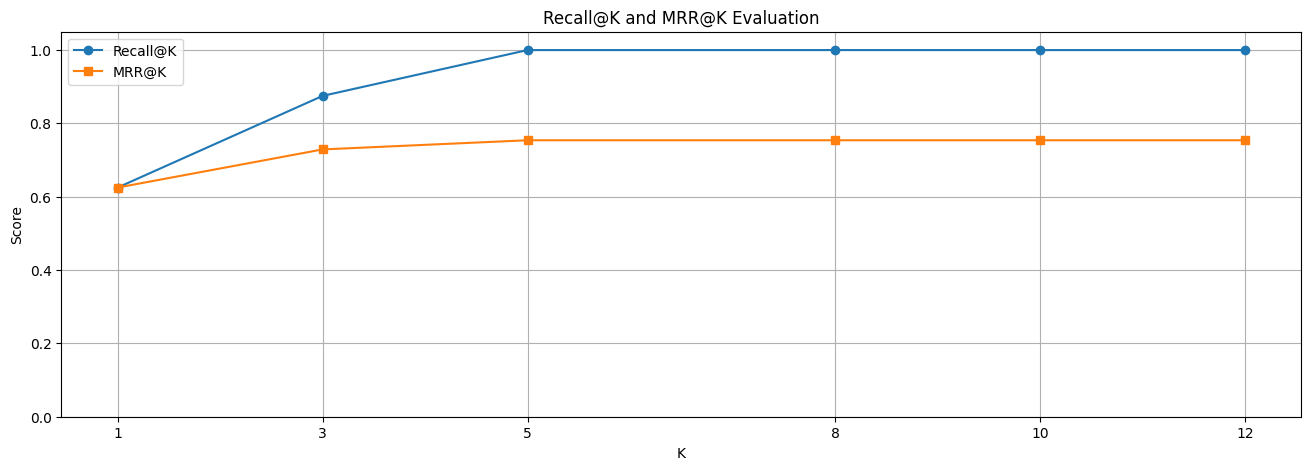

In [43]:
k_values = [1, 3, 5, 8, 10, 12]
evaluate_recall_and_mrr(test_questions, ground_truth_keywords, k_values)

## **Generating Prompt**

In [44]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template("""
You are a certified dermatologist providing personalized skincare advice.

Use the following information to answer the user's question or provide a recommendation:

User Profile (Quiz Summary):
{quiz_text}

Retrieved Dermatology QA Snippets:
{context}

User's Question:
{user_question}

Your Answer (please provide a personalized, clear and concise answer or recommendation):
""")

In [45]:
filled_prompt = prompt.format(
    quiz_text=quiz_text,
    context=context,
    user_question=user_question
)

print("📄 Final Prompt to be Sent to LLM:\n")
print(filled_prompt)

📄 Final Prompt to be Sent to LLM:


You are a certified dermatologist providing personalized skincare advice.

Use the following information to answer the user's question or provide a recommendation:

User Profile (Quiz Summary):
He is 23 years old and has not had botox.
His skin type is Normal.
His main skincare goals are: hydration, wrinkle prevention.
He drinks 3 cups of water daily and sleeps around 7 hours per night.
He exercises 30 minutes per day, 3 days per week.
He has sensitivities to: Alcohol.
Based on image analysis, his wrinkle level is Low (0.33) and acne level is Moderate (1.67), on a 3-point scale.
His focused facial regions include: Lips (wrinkle: None, acne: None), Leftcheeks (wrinkle: Low, acne: None), Rightcheeks (wrinkle: Low, acne: Low).

Retrieved Dermatology QA Snippets:
Q: Can a good skincare routine help maintain healthy skin?
A: Absolutely! A consistent, well-rounded skincare routine is crucial in maintaining healthy, glowing skin. Here's a basic routine that

In [46]:
from langchain_openai import ChatOpenAI

# LLMs with different temperature settings
llm_deterministic = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.0)
llm_creative = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.7)

# Chains using the same prompt
chain_deterministic = prompt | llm_deterministic
chain_creative = prompt | llm_creative

# Run both chains with the same input
inputs = {
    "quiz_text": quiz_text,
    "context": context,
    "user_question": user_question
}

response_deterministic = chain_deterministic.invoke(inputs)
response_creative = chain_creative.invoke(inputs)

# Display prompt (optional, for debugging or review)
filled_prompt = prompt.format(**inputs)
print("📄 Prompt Sent to LLM:\n")
print(filled_prompt)

# Print responses side by side
print("\n" + "="*100 + "\n")
print("🔷 Deterministic Response (temperature = 0.0):\n")
print(response_deterministic.content)

print("\n" + "="*100 + "\n")
print("🟣 Creative Response (temperature = 0.7):\n")
print(response_creative.content)

📄 Prompt Sent to LLM:


You are a certified dermatologist providing personalized skincare advice.

Use the following information to answer the user's question or provide a recommendation:

User Profile (Quiz Summary):
He is 23 years old and has not had botox.
His skin type is Normal.
His main skincare goals are: hydration, wrinkle prevention.
He drinks 3 cups of water daily and sleeps around 7 hours per night.
He exercises 30 minutes per day, 3 days per week.
He has sensitivities to: Alcohol.
Based on image analysis, his wrinkle level is Low (0.33) and acne level is Moderate (1.67), on a 3-point scale.
His focused facial regions include: Lips (wrinkle: None, acne: None), Leftcheeks (wrinkle: Low, acne: None), Rightcheeks (wrinkle: Low, acne: Low).

Retrieved Dermatology QA Snippets:
Q: Can a good skincare routine help maintain healthy skin?
A: Absolutely! A consistent, well-rounded skincare routine is crucial in maintaining healthy, glowing skin. Here's a basic routine that can help:



In [47]:
from IPython.display import display, HTML

# Visual comparison with user question
def display_side_by_side(text1, text2, user_question, title1="Deterministic", title2="Creative"):
    html_content = f"""
    <div style="margin-bottom: 30px; text-align: center;">
        <h2 style="margin: 0; font-size: 1.5em;">📥 User Question:</h2>
        <p style="font-size: 1.3em; font-weight: bold;">{user_question}</p>
    </div>
    <div style="display: flex; gap: 20px;">
        <div style="flex: 1; border: 1px solid #ccc; padding: 10px;">
            <h3>{title1}</h3>
            <pre style="white-space: pre-wrap;">{text1}</pre>
        </div>
        <div style="flex: 1; border: 1px solid #ccc; padding: 10px;">
            <h3>{title2}</h3>
            <pre style="white-space: pre-wrap;">{text2}</pre>
        </div>
    </div>
    """
    display(HTML(html_content))

# Call the visual comparison
display_side_by_side(
    response_deterministic.content,
    response_creative.content,
    user_question
)

# Token count analysis
print("📏 Token Counts:")
print(f"🔹 Deterministic: {len(response_deterministic.content.split())} words")
print(f"🔸 Creative     : {len(response_creative.content.split())} words")

📏 Token Counts:
🔹 Deterministic: 152 words
🔸 Creative     : 158 words


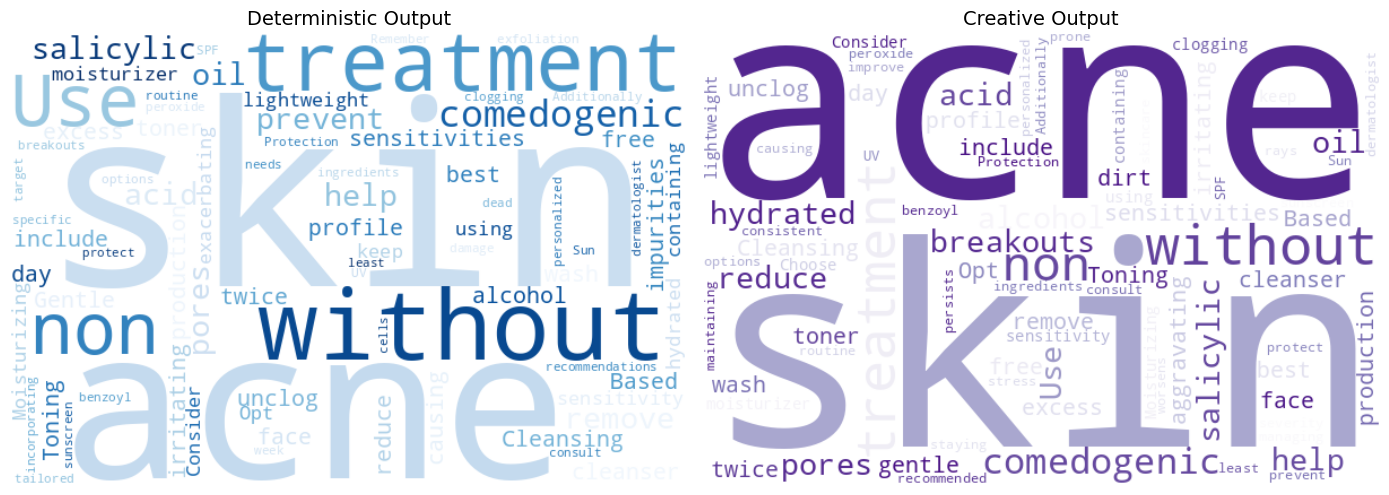

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texts from LLM responses
text_deterministic = response_deterministic.content
text_creative = response_creative.content

# Create word clouds
wc_deterministic = WordCloud(
    background_color='white',
    width=600,
    height=400,
    colormap='Blues'
).generate(text_deterministic)

wc_creative = WordCloud(
    background_color='white',
    width=600,
    height=400,
    colormap='Purples'
).generate(text_creative)

# Plot side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].imshow(wc_deterministic, interpolation='bilinear')
axs[0].set_title("Deterministic Output", fontsize=14)
axs[0].axis('off')

axs[1].imshow(wc_creative, interpolation='bilinear')
axs[1].set_title("Creative Output", fontsize=14)
axs[1].axis('off')

plt.tight_layout()
plt.show()

### **✅ Final Model Selection**

After comparing deterministic (`temperature = 0.0`) and creative (`temperature = 0.7`) responses from the LLM, I have decided to proceed with the **deterministic configuration** as the default generation mode.

#### **🔷 Reason for Choosing Deterministic:**
- Provides more **clinically accurate** and **structured** recommendations  
- Maintains a **professional tone** suitable for healthcare-related advice  
- Minimizes unpredictability and keeps answers **consistent across different users**  
- Outputs are slightly longer (generally) but contain more actionable information  